# RIDGE REGRESSION MODEL 
12_ redge_ regression_fiat500_data_20june23


In [24]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [25]:
data=pd.read_csv("/home/placement/Desktop/saimohan data/csv files/fiat500.csv")

In [26]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [27]:
data.head(2)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.61156,8900
1,2,pop,51,1186,32500,1,45.666359,12.24189,8800


In [28]:
data.tail(2)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
1536,1537,lounge,51,2557,80750,1,45.000702,7.68227,5990
1537,1538,pop,51,1766,54276,1,40.323410,17.56827,7900


In [29]:
data1=data.drop(["lat","lon","ID"],axis=1)

In [30]:
data1=pd.get_dummies(data1)

In [31]:
data1

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0
4,73,3074,106880,1,5700,0,1,0
...,...,...,...,...,...,...,...,...
1533,51,3712,115280,1,5200,0,0,1
1534,74,3835,112000,1,4600,1,0,0
1535,51,2223,60457,1,7500,0,1,0
1536,51,2557,80750,1,5990,1,0,0


In [32]:
z=data1.loc[(data.model=="lounge")]

In [33]:
z

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
3,51,2739,160000,1,6000,1,0,0
6,51,731,11600,1,10750,1,0,0
7,51,1521,49076,1,9190,1,0,0
11,51,366,17500,1,10990,1,0,0
...,...,...,...,...,...,...,...,...
1528,51,2861,126000,1,5500,1,0,0
1529,51,731,22551,1,9900,1,0,0
1530,51,670,29000,1,10800,1,0,0
1534,74,3835,112000,1,4600,1,0,0


In [34]:
#which  the parameter is predected values can be removed from the data file 
#1) we copied the data into another data("y")
#2) later we can removed those file from main data set
y=z['price']
x=z.drop(['price'],axis=1)

In [35]:
#i am calling function to split
#split enter data into ->67% traning  ,  ->33% testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [36]:
x_train.head(5)
#testing and training

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
441,51,762,36448,1,1,0,0
701,51,701,27100,1,1,0,0
695,51,3197,51083,1,1,0,0
1415,51,670,33000,1,1,0,0
404,51,456,14000,1,1,0,0


In [37]:
y_train.head(5)

441      8980
701     10300
695      5880
1415    10490
404      9499
Name: price, dtype: int64

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

ridge = Ridge()

parameters = {'alpha': alpha}

ridge_regressor = GridSearchCV(ridge, parameters)

ridge_regressor.fit(x_train, y_train)


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [39]:
ridge_regressor.best_params_

{'alpha': 30}

In [40]:
ridge=Ridge(alpha=30)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)


In [41]:
from sklearn.metrics import mean_squared_error
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

519771.8129989745

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.8373030813683994

In [43]:
Results=pd.DataFrame(columns=['price','predicted'])
Results['price']=y_test
Results['predicted']=y_pred_ridge
Results=Results.reset_index()
Results['ID']=Results.index
Results.head(15)

,index,price,predicted,ID
0,676,10250,10045.347779,0
1,215,9790,9989.171535,1
2,146,5500,4769.099603,2
3,1319,9900,10048.683238,3
4,1041,8900,9813.944798,4
5,1425,9500,8678.143561,5
6,409,10450,10173.797921,6
7,617,9790,10180.627008,7
8,1526,9300,9107.315259,8
9,1010,4600,5625.007407,9


[]

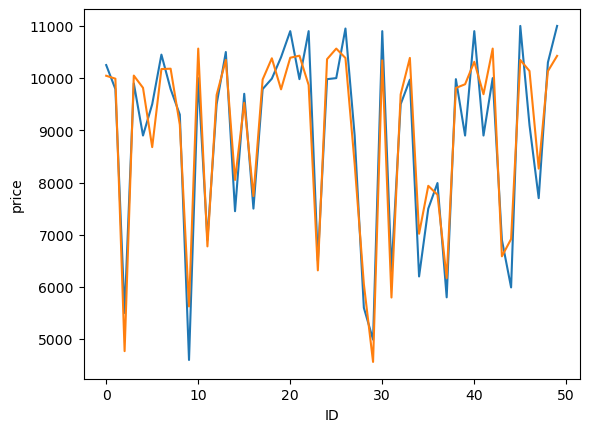

In [44]:
##########################################
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='ID',y='price',data=Results.head(50))
sns.lineplot(x='ID',y='predicted',data=Results.head(50))
plt.plot()

